# Lecture 11: Random Walks
<br><br>
Today we are going to simulate stochastic processes (time-dependent random data), and filled a numpy array with their discrete analogs (random walks). 
<br><br>
Stochastic processes are random process evolving with time in a "true" or "empirical" stochastic/random fashion. Examples including: stock prices, the coordinate of a pollen in the water, the amount of cash in your wallet in a given Las Vegas casino, an index modeling my wife's mood throughout the day, etc.
<br><br>
Then we will observe the effect thatt a plot of the ratio of random walks of lengths $M$ that returned to the origin *at some point*. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

## Review of vectorized generation of random numbers 

In [15]:
# coin fair, flip 10 times, count the no. of heads
# non-vectorized code
head_count = 0
for i in range(10):
    flip = random.random()
    if flip < 0.5: 
        # flip is uniformly distributed from [0,1], this has 0.5 chance
        head_count += 1
        
print("No. of heads in 10 flippings is: ", head_count)

No. of heads in 10 flippings is:  6


### Trick of vectorizing a boolean array
`True` is logical 1, `False` is logical 0.

In [16]:
type(True)

bool

In [17]:
type(1*True) # what just happened?
# after an arithemetic operation, boolean gets converted

int

In [18]:
type(1.0*False)

float

In [19]:
type(True and True)

bool

In [20]:
type(True+True) # what what what? wait what?

int

In [21]:
True+True

2

In [22]:
np.random.random(10)

array([0.7342556 , 0.47201497, 0.77746945, 0.56478056, 0.23470061,
       0.27788777, 0.15781432, 0.07085309, 0.29032831, 0.20250648])

In [26]:
np.random.seed(666) # fix our RNGesus seed
X = np.random.random(10)
print(X < 0.5)
print()
np.sum(X < 0.5)

[False False False False False  True  True  True  True False]



4

In [29]:
# vectorized version of coin flipping
# 10000 simulations of a fair coin flipping
head_count = np.sum(np.random.random(10000)<0.5)
print(head_count)

5047


## Model the coin flipping as a stochastic process

In Lab 4, we have simulated the flipping of an unbiased coin. We can model this process of simulation as a **stochastic process**.
> Consider the following game: we start from the time $t_0 = 0$, at each subsequent $t_i=i$ ($i=1,2,\dots$), we flip a coin. If the coin lands on head, we win $\$ 1 $, otherwise we lose $\$ 1$. Suppose $M_i$ denotes our money (in $\$ $) in the wallet at $t_i$, and $M_0 = 0$ (when the money amount is $<0$, it means we owe money to the dealer).

We want to model how $M_i$ evolves after 10000 steps.

In [30]:
# a modified function of simulate a biased coin in Lab 4
def simulation_coingame(length):
    money = np.zeros(length)
    # money[i] is the money we have at i-th step
    for i in range(1,length):
        if random.random() > 0.5: # can be also <0.5
            # we use random.random() > 0.5 to model the event of head
            money[i] = money[i-1] + 1
        else:
            money[i] = money[i-1] - 1
    return money

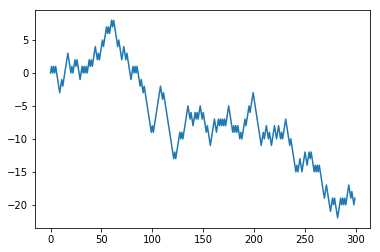

In [35]:
money = simulation_coingame(1000)
plt.plot(money[:300])
plt.show()

### Vectorized version of the simulation above using matrix vector product

In [ ]:
# first vectorized version, RAM cost is large
def simulation_coingame_vec(length):
    samples = np.random.random(length)
    gain = 1.0*(samples < 0.5) - 1.0*(samples > 0.5)
    one_matrix = np.ones((length,length))
    sum_matrix = np.tril(one_matrix) # generate a lower triangular matrix with all 1s
    money = np.matmul(sum_matrix,gain)
    return money

In [40]:
## explanation of the function below
np.random.seed(42)
samples = np.random.random(10)
is_head = 1.0*(samples > 0.5)
type(is_head[0])

numpy.float64

In [44]:
# np.cumsum()
x = np.arange(10)
print(x)
np.cumsum(x)

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [45]:
# use np.cumsum()
def simulation_coingame_vec(length):
    samples = np.random.random(length)
    gain = 1.0*(samples > 0.5) - 1.0*(samples < 0.5) 
    #(samples > 0.5) returns a boolean array where True means our random
    # no. is >0.5
    # a nice trick to convert logical 1s and 0s (boolean) to integers
    # gain[i] models the gain or loss at i-th step
    money = np.cumsum(gain)
    return money

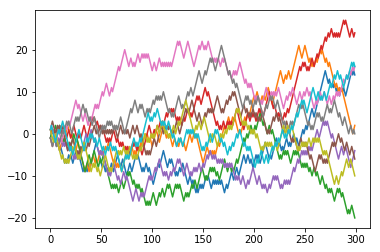

In [46]:
# plot 10 simulations here
for i in range(10):
    money = simulation_coingame_vec(300)
    plt.plot(money[:300])
# each line represents a simulation

## Record multiple simulations

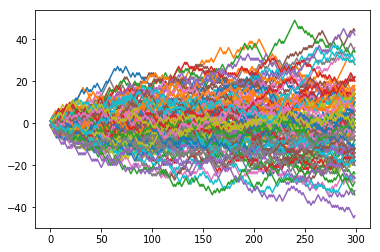

In [48]:
max_step = 300  # max length of a simulated random walk
N = 1000  # number of simulation

simulations = np.zeros([N,max_step])
for i in range(N):
    simulations[i,:] = simulation_coingame_vec(max_step)

for j in range(100):
    plt.plot(simulations[j,:])

### The ratio of simulations up to length M that returned to zero
From above graph, it seems many simulation goes back to 0 at some point.

[  0. 482. 482. 613. 613. 678. 678. 727. 727. 753. 753. 774. 774. 790.
 790. 802. 802. 810. 810. 818. 818. 829. 829. 836. 836. 839. 839. 844.
 844. 849. 849. 851. 851. 857. 857. 862. 862. 865. 865. 870. 870. 873.
 873. 876. 876. 879. 879. 881. 881. 884. 884. 886. 886. 888. 888. 890.
 890. 891. 891. 893. 893. 893. 893. 896. 896. 896. 896. 898. 898. 900.
 900. 903. 903. 904. 904. 905. 905. 906. 906. 906. 906. 908. 908. 910.
 910. 911. 911. 911. 911. 914. 914. 915. 915. 918. 918. 918. 918. 918.
 918. 919. 919. 920. 920. 920. 920. 922. 922. 922. 922. 924. 924. 924.
 924. 925. 925. 926. 926. 926. 926. 926. 926. 927. 927. 928. 928. 928.
 928. 928. 928. 928. 928. 931. 931. 931. 931. 931. 931. 932. 932. 932.
 932. 934. 934. 934. 934. 934. 934. 934. 934. 935. 935. 935. 935. 937.
 937. 937. 937. 937. 937. 938. 938. 938. 938. 938. 938. 938. 938. 939.
 939. 939. 939. 940. 940. 940. 940. 940. 940. 942. 942. 942. 942. 943.
 943. 943. 943. 943. 943. 943. 943. 945. 945. 945. 945. 945. 945. 945.
 945. 

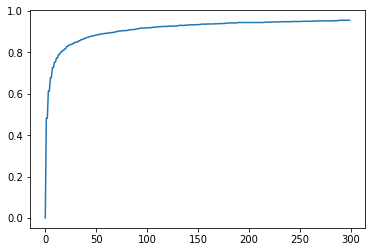

In [49]:
# we'll do this for every time step m and plot

numbers_of_walks_that_went_back_to_0 = np.zeros(max_step)

for step in range(1,max_step):
    for i in range(N): # N is the number of simulation
        if np.any(simulations[i,1:step+1] == 0): # don't want to count step 0
            numbers_of_walks_that_went_back_to_0[step] += 1

print(numbers_of_walks_that_went_back_to_0)
        
# to get the ratio, we need to divide by number of simulations (N=1000)
plt.plot(numbers_of_walks_that_went_back_to_0 / N)

As you can see, it is very likely that a random walk of length 300 will, at some point, return to the origin.

There is a very cool theorem about this:

## Polya's recurrence theorem

**Theorem**  An infinite random walk in 1-dimensional or 2-dimensional grid returns to the origin at some point with probability 1. 

Let's look at the distribution of where the random walk will end after 10,20,100,200 steps. 

In [50]:
from math import sqrt, pi, e

def hist_and_fit(X, num_bins):
    # calculate mean and standard deviation. 
    # plot the histogram of the empirical data
    # plot the normal pdf to fit
    mu = np.mean(X)
    sigma = np.std(X)
    
    Z = np.linspace(-50,50,300)
    plt.axis([-50,50,0,0.1])
    plt.hist(X, num_bins,density=True ,edgecolor = 'black')
    
    guassian_func = lambda mu, sigma: lambda x: 1/(sqrt(2*pi)*sigma) * e**(-0.5*(x - mu)*(x-mu)/(sigma * sigma))
    plt.plot(Z, guassian_func(mu, sigma)(Z))

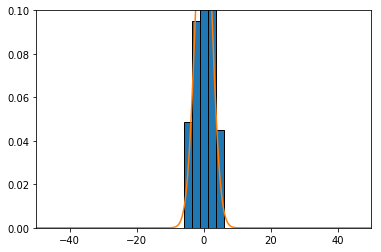

In [51]:
hist_and_fit(simulations[:, 5], 5)

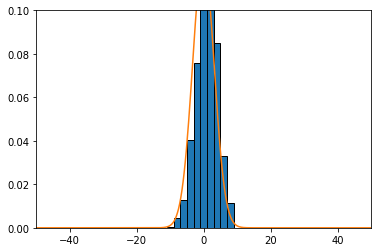

In [52]:
hist_and_fit(simulations[:, 10], 10)

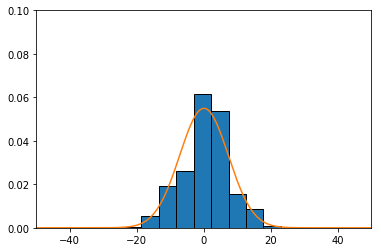

In [53]:
hist_and_fit(simulations[:, 50], 10)

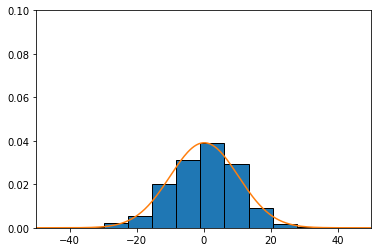

In [54]:
hist_and_fit(simulations[:, 100], 10)

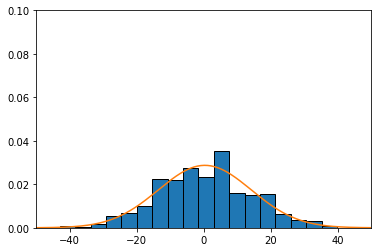

In [55]:
hist_and_fit(simulations[:, 200], 20)

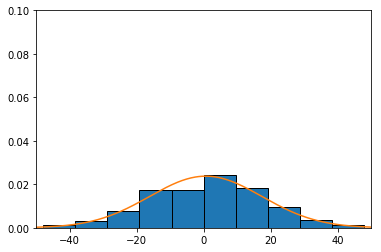

In [56]:
hist_and_fit(simulations[:, 299], 10)

Let's notice some things:

* The mean is always close to zero (makes sense?) 
* The histogram is looking more and more like a Gaussian
* The standard deviation is increasing (best fitting Gaussian is becoming wider)

Let's see how the standard deviation is changing as we increase the length of the random walk. 

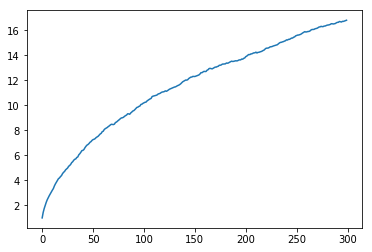

In [57]:
stdevs_of_random_walks = np.apply_along_axis(np.std, 0, simulations)
plt.plot(range(max_step), stdevs_of_random_walks)

Which function does it look like? Square root?

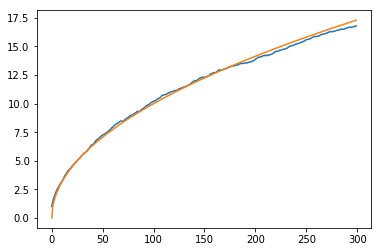

In [58]:
stdevs_of_random_walks = np.apply_along_axis(np.std, 0, simulations)
plt.plot(range(max_step), stdevs_of_random_walks)
plt.plot(range(max_step), np.sqrt(np.array(range(max_step))))

Wow perfect fit!!!

## Next time:

We will learn about the **Law of Large Numbers**, and the **Central Limit Theorem**, which explain the behaviors that we are seeing. 